In [66]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

In [67]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")

vueltas.drop(['Piloto'], axis = 1, inplace = True)

In [68]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [69]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)

In [70]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [71]:
vueltas_test.shape

(1074, 20)

In [72]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [73]:
vueltas_test

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
4077,87.509,2.0,5.0,0.0,1.0,1.0,0.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0,0.0,0.0,1.0,0.0
4078,87.574,3.0,6.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0,0.0,0.0,1.0,0.0
4079,87.601,4.0,7.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0,0.0,0.0,1.0,0.0
4080,87.937,5.0,8.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0,0.0,0.0,1.0,0.0
4081,87.761,6.0,9.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.5,1.0,90.757,88.555,1.0,27.0,0.0,1.0,0.0,0.0
5147,87.196,24.0,3.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.4,1.0,90.558,89.588,1.0,27.0,0.0,1.0,0.0,0.0
5148,87.003,25.0,4.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,92.489,88.079,1.0,27.0,0.0,1.0,0.0,0.0
5149,87.279,26.0,5.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,108.293,88.687,1.0,27.0,0.0,1.0,0.0,0.0


In [77]:
sum(vueltas_train['Stint'] == 4)

16

In [27]:
df = pd.DataFrame(vueltas_test_scaler)

In [28]:
df[:66]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.136404,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.055556,0.108344,0.110651,0.10,0.116667,0.0,0.0,1.0,0.0
1,0.137341,0.015873,0.111111,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.009804,0.055556,0.103493,0.101356,0.10,0.116667,0.0,0.0,1.0,0.0
2,0.137730,0.031746,0.133333,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.014706,0.055556,0.108842,0.114564,0.10,0.116667,0.0,0.0,1.0,0.0
3,0.142573,0.047619,0.155556,0.0,0.0,0.0,0.0,1.417219,0.0,-3.081481,1.004902,0.055556,0.111330,0.118250,0.10,0.116667,0.0,0.0,1.0,0.0
4,0.140036,0.063492,0.177778,0.0,0.0,0.0,0.0,1.410596,0.0,-3.081481,1.014706,0.055556,0.106083,0.119969,0.10,0.116667,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.132022,0.968254,0.400000,1.0,0.0,1.0,0.0,1.384106,0.0,-2.933333,0.941176,0.000000,0.133245,0.092411,0.10,1.000000,0.0,1.0,0.0,0.0
62,0.134040,0.984127,0.422222,1.0,0.0,1.0,0.0,1.377483,0.0,-2.933333,0.941176,0.000000,0.130576,0.087141,0.10,1.000000,0.0,1.0,0.0,0.0
63,0.137874,1.000000,0.444444,1.0,0.0,1.0,0.0,1.377483,0.0,-3.007407,0.946078,0.000000,0.124832,0.091031,0.10,1.000000,0.0,1.0,0.0,0.0
64,0.140468,0.000000,0.088889,0.0,0.0,0.0,0.0,1.397351,0.0,-3.007407,1.009804,0.166667,0.110651,0.117436,0.25,0.183333,0.0,0.0,1.0,0.0


In [29]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 5])
    #print(vueltas_train_scaler[i + future - 1:i + future, 5])
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    testY.append(vueltas_test_scaler[i + future - 1:i + future,5
                                    ])


In [30]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [31]:
trainX.shape

(4067, 10, 20)

In [32]:
trainY.shape

(4067, 1)

In [33]:
testX.shape

(1064, 10, 20)

In [34]:
testY.shape

(1064, 1)

In [78]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss= "mse") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 10, 256)           283648    
                                                                 
 dropout_17 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_18 (LSTM)              (None, 128)               197120    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 480,897
Trainable params: 480,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
58/58 [==============================] - 5s 50ms/step - loss: 0.0313 - val_loss: 0.0267
Epoch 2/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0148 - val_loss: 0.0170
Epoch 3/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0120 - val_loss: 0.0146
Epoch 4/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0103 - val_loss: 0.0120
Epoch 5/12
58/58 [==============================] - 3s 44ms/step - loss: 0.0096 - val_loss: 0.0114
Epoch 6/12
58/58 [==============================] - 3s 45ms/step - loss: 0.0091 - val_loss: 0.0111
Epoch 7/12
58/58 [==============================] - 3s 47ms/step - loss: 0.0090 - val_loss: 0.0113
Epoch 8/12
58/58 [==============================] - 3s 47ms/step - loss: 0.0092 - val_loss: 0.0131
Epoch 9/12
58/58 [==============================] - 3s 49ms/step - loss: 0.0082 - val_loss: 0.0110
Epoch 10/12
58/58 [==============================] - 2s 42ms/step - loss: 0.0082 - val_loss: 0.0110
Epoch 11/

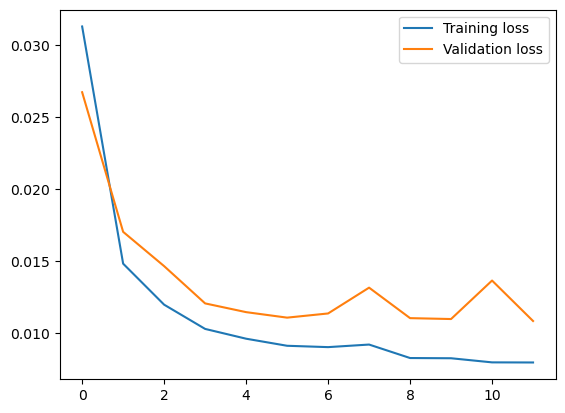

In [79]:
history = model.fit(trainX, trainY, epochs=12, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [80]:
prediction = model.predict(testX[100:101]) 
prediction

1/1 [==============================] - 0s 261ms/step


array([[0.5237852]], dtype=float32)

In [81]:
testY[100]

array([0.66666667])

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [82]:
y_real = testY.tolist()

In [83]:
y_pred = []
for i in range (0, len(y_real)):
    prediction = model.predict(testX[i:i+1])     
    valor = prediction[0][0].item()
    y_pred.append(valor)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


In [84]:
print(len(y_real), len(y_pred))

1064 1064


In [85]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [86]:
uniques

[[0.0], [1.0], [0.6666666666666667], [0.3333333333333333]]

In [87]:
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [94]:
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) if x[0] != 1 else abs(val-0.7) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [95]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [96]:
print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.7453007518796992


### Ahora tenemos que sacar las demás métricas y como tenemos 4 clases

### El número de stint que más veces aparece en el conjunto de test, ¿qué porcentaje sobre el total supone? 

In [97]:
frecuencias = {}

y_real_ = [sublista[0] for sublista in y_real]
frecuencias = {}
numero_mas_frecuente = None
frecuencia_maxima = 0

for numero in y_real_:
    if numero in frecuencias:
        frecuencias[numero] += 1
    else:
        frecuencias[numero] = 1

    if frecuencias[numero] > frecuencia_maxima:
        frecuencia_maxima = frecuencias[numero]
        numero_mas_frecuente = numero

print("El número que aparece con más frecuencia es:", numero_mas_frecuente)
print("Las frecuencias de cada número son:")
total = len(y_real_)

for numero, frecuencia in frecuencias.items():
    print(numero, "aparece", frecuencia, "veces que supone un", round((frecuencia/total)*100, 2), "del total")
    

El número que aparece con más frecuencia es: 0.6666666666666667
Las frecuencias de cada número son:
0.0 aparece 195 veces que supone un 18.33 del total
0.3333333333333333 aparece 329 veces que supone un 30.92 del total
0.6666666666666667 aparece 350 veces que supone un 32.89 del total
1.0 aparece 190 veces que supone un 17.86 del total


In [98]:
clases = [str(sublista[0]) for sublista in uniques]
#Tenemos las clases en tipo string
clases

['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']

### Ahora tenemos la lista clases, que son nuestras 4 clases para clasificar. Asi que vamos a pasar las clases a string, y vamos a sacar FN, FP, TP, TN

In [99]:
y_real_str = [str(sublista) for sublista in y_real_]
y_pred_normalized_str = [str(sublista) for sublista in y_pred_normalized]

In [100]:
from sklearn.metrics import confusion_matrix, classification_report
# Calcular la matriz de confusión
cm = confusion_matrix(y_real_str, y_pred_normalized_str, labels=clases)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(clases)
print(cm)

# Imprimir las métricas básicas
print("Métricas:")
print(classification_report(y_real_str, y_pred_normalized_str, labels=clases))

Matriz de confusión:
['0.0', '1.0', '0.6666666666666667', '0.3333333333333333']
[[176   9   3   7]
 [  0 159  30   1]
 [  0   0 162 188]
 [ 30   2   1 296]]
Métricas:
                    precision    recall  f1-score   support

               0.0       0.85      0.90      0.88       195
               1.0       0.94      0.84      0.88       190
0.6666666666666667       0.83      0.46      0.59       350
0.3333333333333333       0.60      0.90      0.72       329

          accuracy                           0.75      1064
         macro avg       0.80      0.78      0.77      1064
      weighted avg       0.78      0.75      0.74      1064



### Cuidado, ¿puede haber desbalanceo de clases?